 #  <p style="text-align: center;">Technical Support Data Analysis

Technical support data can often be a rich source of information on opportunities for improving customer experience. The lesser the trouble customers have with the product the better. Even better when the customers are able to overcome
technical challenge quickly with minimal effort. Let us analyze the tech support data and do some basic analysis on problem types, time to resolve the problem and channel of suppor that is most suitable

## Loading the Dataset

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#import sklearn.metrics
from sklearn.metrics import silhouette_score

tech_supp_df = pd.read_csv("Nutrient+Composition+Dataset.csv")
tech_supp_df.dtypes

S.No          int64
Protein     float64
Fat         float64
vitaminC    float64
Fiber       float64
Product      object
dtype: object

The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [70]:
tech_supp_df.shape

(1746, 6)

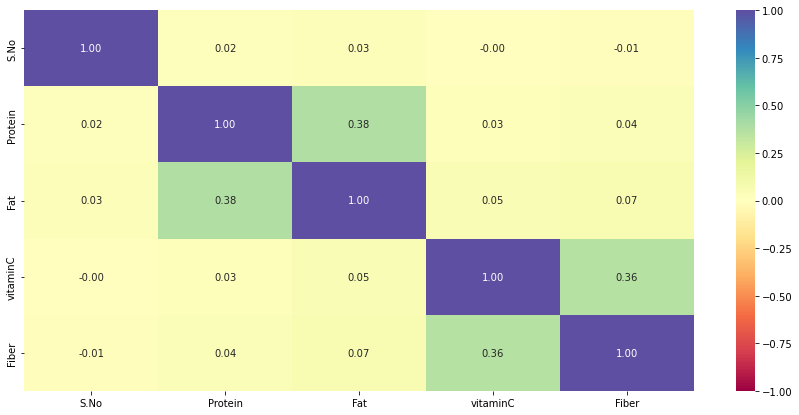

In [71]:
tech_supp_df.head()
tech_supp_df.drop("S.No", axis=1)
plt.figure(figsize=(15, 7))
sns.heatmap(tech_supp_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

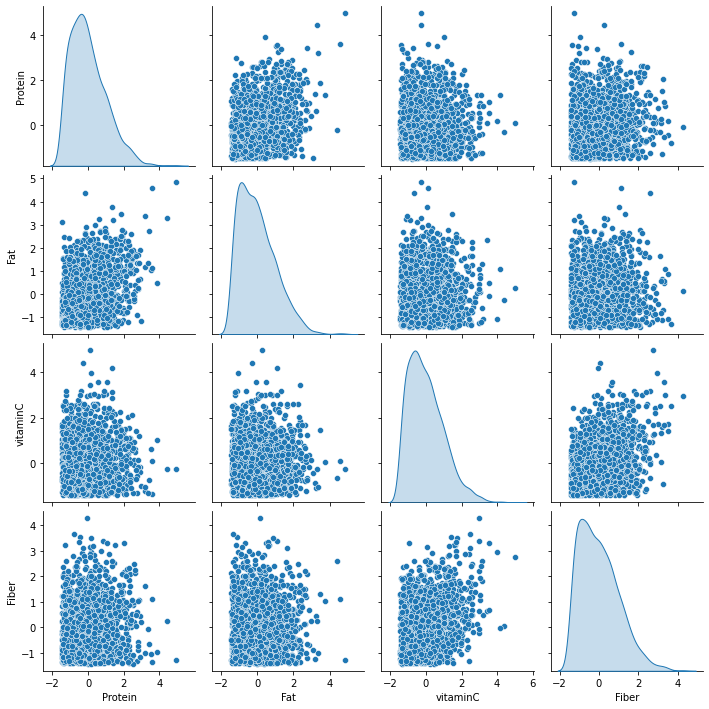

In [72]:
techSuppAttr=tech_supp_df.iloc[:,1:5]
techSuppScaled=techSuppAttr.apply(zscore)
sns.pairplot(techSuppScaled,diag_kind='kde')

## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

C:\Users\barnw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

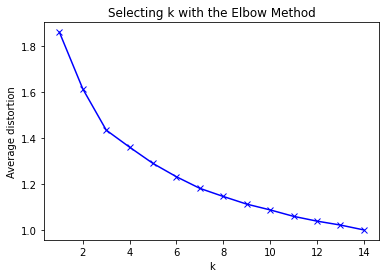

In [73]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(techSuppScaled)
    prediction=model.predict(techSuppScaled)
    meanDistortions.append(sum(np.min(cdist(techSuppScaled, model.cluster_centers_, 'euclidean'), axis=1)) / techSuppScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters and 5 clusters

In [92]:
kmeans_algo = KMeans(n_clusters=3, random_state=1)
kmeans_algo.fit(techSuppScaled)

techSuppScaled["KM_segments"] = kmeans_algo.labels_

Clust = techSuppScaled.groupby(["KM_segments"])
Clust.mean()

,Protein,Fat,vitaminC,Fiber,GROUP
KM_segments,,,,,
0,-0.258298,-0.171069,1.150800,1.055507,0.0
1,-0.356830,-0.429196,-0.460409,-0.462523,1.0
2,1.114963,1.202877,-0.030512,0.068912,2.0


In [83]:
# Let us first start with K = 3
for x in range(3, 8):
    cluster = KMeans(n_clusters= x, random_state=1)
    prediction = cluster.fit_predict((techSuppScaled))
    print(silhouette_score(techSuppScaled, prediction))


0.35220646822734575
0.314728710188739
0.3099100064905814
0.28300014629436526
0.2557403007386037


### Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot.


In [88]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.count()

,S.No,Protein,Fat,vitaminC,Fiber,Product
GROUP,,,,,,
0,393,393,393,393,393,393
1,956,956,956,956,956,956
2,397,397,397,397,397,397


array([[<AxesSubplot:title={'center':'Fat'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Fiber'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Protein'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'vitaminC'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

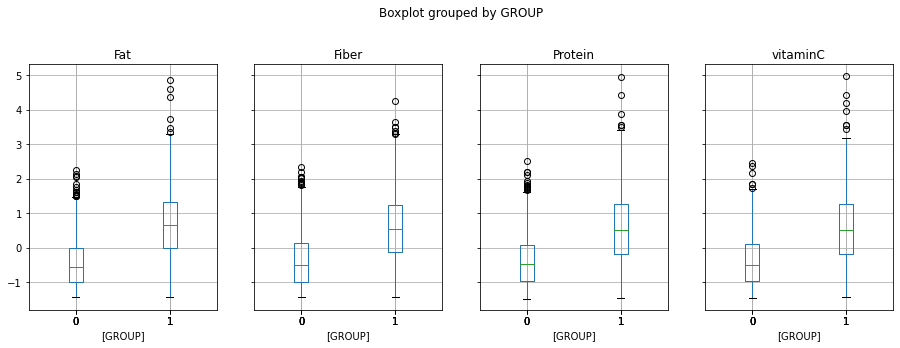

In [77]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [78]:
#  Let us next try with K = 5, the next elbow point

In [79]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,S.No,Protein,Fat,vitaminC,Fiber,Product,GROUP
0,1,-0.749825,0.426892,0.287212,1.279936,"Amaranth leaves, cooked, boiled, drained, with...",2
1,2,2.230835,-0.304578,-0.881972,-0.387079,Bacon and beef sticks,4
2,3,-0.060478,0.451551,2.450659,1.729280,"Apples, frozen, unsweetened, unheated (Include...",3
3,4,-0.330121,-0.508314,-1.008903,-0.848201,"Alcoholic beverage, beer, light, BUD LIGHT",1
4,5,-1.259850,-0.560451,-1.255896,-0.548145,"Alcoholic beverage, daiquiri, canned",0


In [80]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

,S.No,Protein,Fat,vitaminC,Fiber
GROUP,,,,,
0,877.190377,-0.749891,-0.706181,-0.135209,-0.641946
1,877.770538,0.302065,0.050380,-0.719068,-0.774178
2,862.946488,-0.422455,-0.381667,-0.410223,0.893327
3,846.354962,-0.122611,-0.022403,1.595618,1.014414
4,893.262712,1.158918,1.242255,0.065158,0.133484


array([[<AxesSubplot:title={'center':'Fat'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Fiber'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Protein'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'vitaminC'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

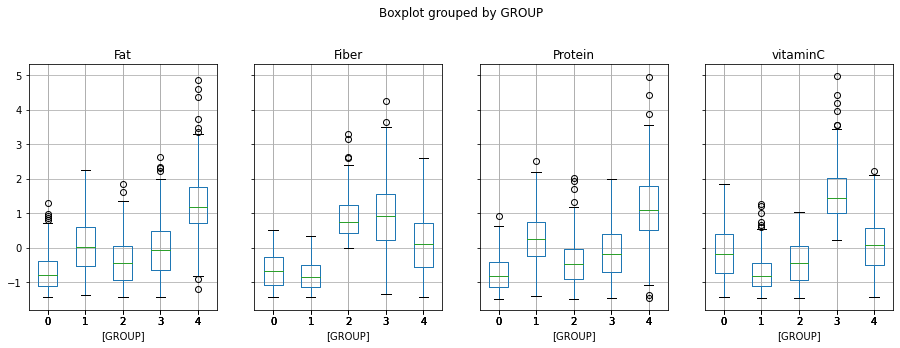

In [81]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))